In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
z = 5
# p = np.loadtxt('points%d.txt'%0)
# s = np.loadtxt('similarities%d.txt'%0)
# m = np.loadtxt('models%d.txt'%0)
p = np.vstack((np.loadtxt('points%d.txt'%z), np.loadtxt('points%d.txt'%(z+1))))#, np.loadtxt('points%d.txt'%(z+2)), np.loadtxt('points%d.txt'%(z+3))))
s = np.hstack((np.loadtxt('similarities%d.txt'%z), np.loadtxt('similarities%d.txt'%(z+1))))#, np.loadtxt('similarities%d.txt'%(z+2)), np.loadtxt('similarities%d.txt'%(z+3))))
m = np.vstack((np.loadtxt('models%d.txt'%z), np.loadtxt('models%d.txt'%(z+1))))#, np.loadtxt('models%d.txt'%(z+2)), np.loadtxt('models%d.txt'%(z+3))))

In [32]:
p_mean = np.mean(p, axis=1)
p_std = 2*np.std(p, axis=1)/np.sqrt(p.shape[1])
print(np.mean(p_std), p_std)

0.54416661307 [ 0.60178062  0.36288737  0.50602226  0.38779322  1.34441365  0.68099225
  0.74511739  0.64858892  0.67349045  0.70272837  0.51320024  0.76980036
  0.54433105  0.40572041  0.99155608  0.18144368  0.86548992  0.40572041
  0.46061131  0.40572041  0.74811148  0.54433105  1.03840787  0.72577474
  0.53756891  0.40572041  0.31426968  0.85104632  0.60178062  0.25660012
  0.56736421  0.79089469  0.31426968  0.88888889  0.32256655  1.07343531
  0.25660012  0.88888889  0.48005487  0.40572041  0.34094346  0.6789001
  0.33553608  0.4379962   0.44444444  0.50642371  0.31426968  0.81144083
  0.25660012  0.25660012  0.25660012  0.62983132  0.42240749  1.01765146
  0.40572041  0.44444444  0.62594744  0.52764841  0.40572041  0.74811148
  0.65699431  0.18144368  0.76980036  0.86125307  0.36288737  0.62105842
  0.76529934  0.90317734  0.54433105  0.66284532  0.74811148  0.7505523
  0.48005487  0.36288737  0.25660012  0.60178062  0.40572041  0.62853936
  0.25660012  0.74511739  0.78418551  0

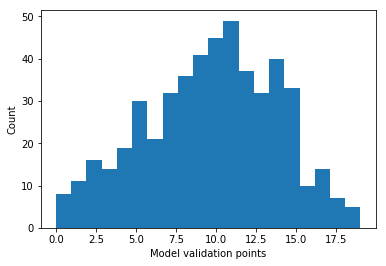

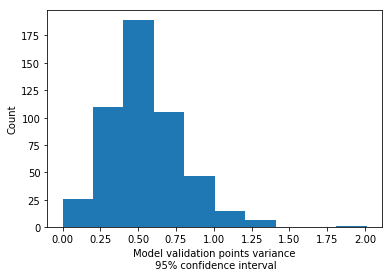

In [33]:
plt.hist(p_mean, 20)
plt.xlabel("Model validation points")
plt.ylabel("Count")
# plt.title("The distribution of points over 400 naive models")
plt.savefig('points-dist.png')
plt.show()

plt.hist(p_std)
plt.xlabel("Model validation points variance\n 95% confidence interval")
plt.ylabel("Count")
# plt.title("The distribution of points over 400 naive models")
plt.savefig('points-var.png')
plt.show()

In [15]:
from scipy.odr import *

p = p_mean

def f(param, q):
    return param[0] + param[1]*q

b = [0,0]
odr = ODR(Data(np.hstack(p), np.hstack(s)), Model(f), beta0=b)
params = odr.run().beta
odr.run().pprint()
print(odr.run().sum_square)

Beta: [ 0.70897401  0.00286013]
Beta Std Error: [ 0.00622925  0.00059284]
Beta Covariance: [[ 0.01291092 -0.00112956]
 [-0.00112956  0.00011694]]
Residual Variance: 0.0030054841115914306
Inverse Condition #: 0.03558824553813198
Reason(s) for Halting:
  Sum of squares convergence
1.4967310875725326


[ 0.70897401  0.00286013]


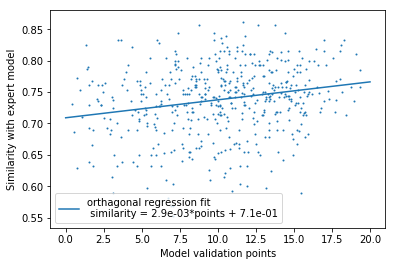

In [17]:
plt.scatter([i+np.random.random() for i in np.hstack(p)], np.hstack(s), s=1)
x = np.linspace(0, 20, 100)
beta = (odr.run().beta)
print(beta)
plt.plot(x, f(params, x), label="orthagonal regression fit\n similarity = %.1e*points + %.1e"%(beta[1], beta[0]))
plt.xlabel("Model validation points")
plt.ylabel("Similarity with expert model")
# plt.title("Scatter plot of similarity of naive models to the expert model, \n and their respective scores")
plt.legend()
plt.savefig('similarity.png')
plt.show()

In [38]:
from scipy import stats

test = [np.random.normal() for i in range(10000)]
p = np.hstack(p)
k2, prob = stats.normaltest(p)
print(len(p[p<15])/len(p))
print(prob)

0.8552592592592593
4.57400475464e-79


In [19]:
import sympy as sp
(w_0_2, w_0_7, w_2_2, w_2_6, w_0_3, w_0_4, w_0_5, w_0_8, w_0_9, w_1_3, w_1_4,
w_1_5, w_1_8, w_2_3, w_2_4, w_2_8, w_5_4, w_7_4, w_7_8, w_8_3, w_8_4, w_9_5,
w_1_2, w_3_1, w_4_2, w_5_1, w_7_1, w_8_1, w_9_1, w_8_2) = sp.symbols('w_0_2 \
w_0_7 w_2_2 w_2_6 w_0_3 w_0_4 w_0_5 w_0_8 w_0_9 w_1_3 w_1_4 w_1_5 w_1_8 w_2_3 \
w_2_4 w_2_8 w_5_4 w_7_4 w_7_8 w_8_3 w_8_4 w_9_5 w_1_2 w_3_1 w_4_2 w_5_1 w_7_1 \
w_8_1 w_9_1 w_8_2', real=True)
W_fixed = np.array([
    [ 1, -w_0_7,      0,  -w_4_2*w_0_2,  w_0_3,  w_0_4,   w_0_5,  w_0_8, w_0_9],
    [ 0,      0,      0,             0,      0,      0,       0,      0,     0],
    [ 0,      0,      1,             0,      0,      0,       0,      0,     0],
    [ 0,  w_2_6,      0, 1-w_4_2*w_2_2,      0,      0,       0,      0,     0],
    [ 0,      0,      0,             0,      0,      0,       0,      0,     0],
    [ 0,      0,      0,     0.9*w_4_2,      0,      0,       0,      0,     0],
    [ 0,      0,      0,             0,      0,      0,       0,      0,     0],
    [ 0,      0,      0,  -w_4_2*w_8_2,      0,      0,       0,      0,     0],
    [ 0,      0,      0,             0,      0,      0,       0,      0,     0]
])

W_expert = np.array([
    [ 0,      0,      0,             0,      0,      0,       0,      0,     0],
    [ 0,      0,  w_7_1,             0,      0,  w_7_4,       0,  w_7_8,     0],
    [ 0,      0,      0,         w_1_2,  w_1_3,  w_1_4,   w_1_5,  w_1_8,     0],
    [ 0,      0,      0,             0,  w_2_3,  w_2_4,       0,  w_2_8,     0],
    [ 0,      0,  w_3_1,             0,      0,      0,       0,      0,     0],
    [ 0,      0,      0,             0,      0,      0,       0,      0,     0],
    [ 0,      0,  w_5_1,             0,      0,  w_5_4,       0,      0,     0],
    [ 0,      0,  w_8_1,             0,  w_8_3,  w_8_4,       0,      0,     0],
    [ 0,      0,  w_9_1,             0,      0,      0,   w_9_5,      0,     0]
])

W = W_fixed.flatten()
W[W!=0] = 1
W = np.array(W,dtype=int)
nrFixed = sum(W)
select = 1-W
print(select)
for i in [9, 10, 18, 19, 27, 28, 36, 37, 45, 46, 54, 55, 63, 64, 72, 73]:
    select[i] = 0
print(select)
m_part = m[:,[bool(w) for w in select]]
m_part.shape

[0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
[0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 1 1]


(500, 53)

(500, 81)
[ 1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.
  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.
  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.]
[[ 0.22859216  0.0105225 ]
 [ 0.0105225   0.23439768]]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.
  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.]
[[ 0.22859216 -0.00870827]
 [-0.00870827  0.23439768]]


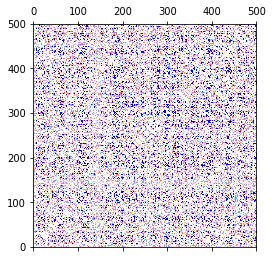

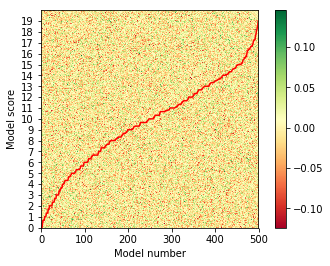

In [26]:
from matplotlib.colors import LogNorm
N = 500
print(m.shape)
inds = p.argsort()
m1 = m_part[0]
m_sort = m_part[inds]
m2 = m_sort[0]
print(m1)
print(m2)
print(np.cov((m1,m2)))
m2[4:7] = (1, 0, 0)
print(m2)
print(np.cov((m1,m2)))
C = np.cov(m_part)
C_sort = np.cov(m_sort)
for i in range(N):
    C[i,i] = 0
    C_sort[i,i] = 0
    
plt.matshow(C, norm=LogNorm(), cmap=plt.get_cmap('bwr'), origin='lower')
plt.show()


plt.imshow(C_sort, cmap=plt.get_cmap('RdYlGn'), origin='lower')
plt.plot(range(N), N/20*p[inds], c='r')
plt.yticks([len(p)/20*i for i in range(20)], [i for i in range(20)])
plt.xlabel("Model number")
plt.ylabel("Model score")
# plt.title("Covariance matrix of 600 models\n Sorted on score")
plt.colorbar()
plt.savefig('covariance.png')
plt.show()

47
[[ 1.          1.          0.38297872  1.          1.          1.          1.
   1.          1.        ]
 [ 0.          0.          0.31914894  0.27659574  0.31914894  0.25531915
   0.40425532  0.34042553  0.34042553]
 [ 0.          0.          1.          0.34042553  0.46808511  0.25531915
   0.46808511  0.29787234  0.36170213]
 [ 0.          1.          0.38297872  1.          0.42553191  0.46808511
   0.27659574  0.31914894  0.25531915]
 [ 0.          0.          0.36170213  0.44680851  0.19148936  0.27659574
   0.42553191  0.27659574  0.44680851]
 [ 0.          0.          0.42553191  1.          0.36170213  0.17021277
   0.25531915  0.38297872  0.29787234]
 [ 0.          0.          0.46808511  0.42553191  0.36170213  0.34042553
   0.21276596  0.36170213  0.25531915]
 [ 0.          0.          0.44680851  1.          0.31914894  0.42553191
   0.25531915  0.29787234  0.40425532]
 [ 0.          0.          0.4893617   0.4893617   0.27659574  0.44680851
   0.31914894  0.29787234  

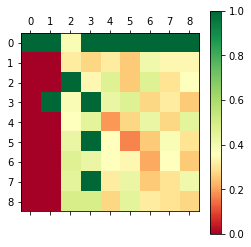

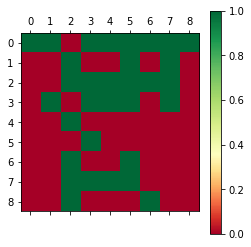

In [23]:
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

mid = sum(W)/(81-28)
for n, i in enumerate(p[inds]):
    if i == 15:
        break
        
W = W_expert.flatten()
W[W!=0] = 1
W = np.array(W,dtype=int)
W_f = W_fixed.flatten()
W_f[W_f!=0] = 1
W_f = np.array(W_f,dtype=int)        
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


models = m[inds][n:]

print(len(models))
print(np.mean(models, axis=0).reshape(9,9))
print(mid)
probs = np.mean(models, axis=0)
# probs -= np.mean(probs)
# probs -= 1-select
plt.matshow(probs.reshape(9,9),norm=MidpointNormalize(midpoint=mid), cmap=plt.get_cmap('RdYlGn'))
plt.colorbar()
# plt.title("Probability of finding a causality in the model\n for models scoring higher than 11 points")
plt.savefig('probs_from_12.png')
plt.show()

plt.matshow((W+W_f).reshape(9,9), norm=MidpointNormalize(midpoint=mid), cmap=plt.get_cmap('RdYlGn'))
# plt.title("Probability of finding a causality in the expert model")
plt.colorbar()
plt.savefig('probs_expert.png')
plt.show()

# plt.matshow((W_f).reshape(9,9),norm=MidpointNormalize(midpoint=0),  cmap=plt.get_cmap('RdYlGn'))
# plt.colorbar()
# plt.show()

# plt.matshow(((1-W)*probs).reshape(9,9),norm=MidpointNormalize(midpoint=0),  cmap=plt.get_cmap('RdYlGn'))
# plt.colorbar()
# plt.show()